<a href="https://colab.research.google.com/github/FisanUJI/Ai-Projects/blob/Wind-Energy/Wind_Speed_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import openpyxl
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **STEP 1: DATA CLEANING AND PREPROCESSING**

In [ ]:
# Variable declaration
folder_path = '/content/drive/MyDrive/Ai Projects/Wind Energy/Data'
output_folder = '/content/drive/MyDrive/Ai Projects/Wind Energy/Output'

data = pd.read_excel('/content/drive/MyDrive/Ai Projects/Wind Energy/Data/Valencia_Wind_Speed_data_2024.xlsx')

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Ai Projects/Wind Energy/Data/Jan_2024.csv')
data.head()

,Time,Temperature (°F),Unnamed: 2,Unnamed: 3,Dew Point (°F),Unnamed: 5,Unnamed: 6,Humidity (%),Unnamed: 8,Unnamed: 9,Wind Speed (mph),Unnamed: 11,Unnamed: 12,Pressure (in),Unnamed: 14,Unnamed: 15,Precipitation (in)
0,Jan,Max,Avg,Min,Max,Avg,Min,Max,Avg,Min,Max,Avg,Min,Max,Avg,Min,Total
1,1,63,51.6,43,43,37.3,30,81,60.8,30,12,5.4,1,29.9,29.8,29.8,0
2,2,66,55.6,41,46,37.6,28,70,51.8,30,17,10,3,29.9,29.8,29.8,0
3,3,72,63.9,59,50,48,45,68,57.2,46,21,13.2,5,29.8,29.8,29.7,0
4,4,68,59,52,52,49.3,46,94,71.7,46,15,5.8,1,29.8,29.7,29.5,0


In [ ]:
data.columns

Index(['Time', 'Temperature (°F)', 'Unnamed: 2', 'Unnamed: 3',
       'Dew Point (°F)', 'Unnamed: 5', 'Unnamed: 6', 'Humidity (%)',
       'Unnamed: 8', 'Unnamed: 9', 'Wind Speed (mph)', 'Unnamed: 11',
       'Unnamed: 12', 'Pressure (in)', 'Unnamed: 14', 'Unnamed: 15',
       'Precipitation (in)'],
      dtype='object')

In [ ]:
# Function to clean and rename columns
def clean_and_rename_columns(data):
  # Rename columns
  data = data.rename(columns={
      'Time': 'Time',
      'Temperature (°F)': 'max_Temp',
      'Unnamed: 2': 'avg_Temp',
      'Unnamed: 3': 'min_Temp',
      'Dew Point (°F)': 'max_Dew_Point',
      'Unnamed: 5':'avg_Dew_Point',
      'Unnamed: 6': 'min_Dew_Point',
      'Humidity (%)': 'max_Humidity',
       'Unnamed: 8': 'avg_Humidity',
      'Unnamed: 9': 'min_Humidity',
      'Wind Speed (mph)': 'max_Wind_Speed',
      'Unnamed: 11': 'avg_Wind_Speed',
      'Unnamed: 12': 'min_Wind_Speed',
      'Pressure (in)': 'max_Pressure',
      'Unnamed: 14': 'avg_Pressure',
      'Unnamed: 15': 'min_Pressure',
      'Precipitation (in)': 'Precipitation'
  })
  # Remove the row in index 0
  data = data.drop(0)
  return data

In [ ]:
jan = clean_and_rename_columns(data)
jan.head()

,Time,max_Temp,avg_Temp,min_Temp,max_Dew_Point,avg_Dew_Point,min_Dew_Point,max_Humidity,avg_Humidity,min_Humidity,max_Wind_Speed,avg_Wind_Speed,min_Wind_Speed,max_Pressure,avg_Pressure,min_Pressure,Precipitation
1,1,63,51.6,43,43,37.3,30,81,60.8,30,12,5.4,1,29.9,29.8,29.8,0
2,2,66,55.6,41,46,37.6,28,70,51.8,30,17,10,3,29.9,29.8,29.8,0
3,3,72,63.9,59,50,48,45,68,57.2,46,21,13.2,5,29.8,29.8,29.7,0
4,4,68,59,52,52,49.3,46,94,71.7,46,15,5.8,1,29.8,29.7,29.5,0
5,5,63,56.1,52,52,40.7,28,100,59.2,38,22,12.8,2,29.5,29.4,29.4,0


In [ ]:
jan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 1 to 31
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Time            31 non-null     object
 1   max_Temp        31 non-null     object
 2   avg_Temp        31 non-null     object
 3   min_Temp        31 non-null     object
 4   max_Dew_Point   31 non-null     object
 5   avg_Dew_Point   31 non-null     object
 6   min_Dew_Point   31 non-null     object
 7   max_Humidity    31 non-null     object
 8   avg_Humidity    31 non-null     object
 9   min_Humidity    31 non-null     object
 10  max_Wind_Speed  31 non-null     object
 11  avg_Wind_Speed  31 non-null     object
 12  min_Wind_Speed  31 non-null     object
 13  max_Pressure    31 non-null     object
 14  avg_Pressure    31 non-null     object
 15  min_Pressure    31 non-null     object
 16  Precipitation   31 non-null     object
dtypes: object(17)
memory usage: 4.2+ KB


In [ ]:
# Iterate through the csv file to clean it.
for filename in os.listdir(folder_path):
  if filename.endswith('.csv'): # Ensures it's a CSV file.
    file_path = os.path.join(folder_path, filename)
    print(f"Processing file: {filename}")

    # Read CSV file from file path
    data = pd.read_csv(file_path)

    # Clean data in the CSV file
    cleaned_data = clean_and_rename_columns(data)

    # Create output folder if it doesn't exist
    if not os.path.exists(output_folder):
      os.makedirs(output_folder)

    # Save the cleaned data to a new CSV file in the output folder
    output_file_path = os.path.join(output_folder, f"cleaned_{filename}")
    cleaned_data.to_csv(output_file_path, index=False)

    print(f"Cleaned data saved to: {output_file_path}")

print("All files processed.")

Processing file: Jan_2024.csv
Cleaned data saved to: /content/drive/MyDrive/Ai Projects/Wind Energy/Output/cleaned_Jan_2024.csv
Processing file: Feb_2024.csv
Cleaned data saved to: /content/drive/MyDrive/Ai Projects/Wind Energy/Output/cleaned_Feb_2024.csv
Processing file: Mar_2024.csv
Cleaned data saved to: /content/drive/MyDrive/Ai Projects/Wind Energy/Output/cleaned_Mar_2024.csv
Processing file: Apr_2024.csv
Cleaned data saved to: /content/drive/MyDrive/Ai Projects/Wind Energy/Output/cleaned_Apr_2024.csv
Processing file: May_2024.csv
Cleaned data saved to: /content/drive/MyDrive/Ai Projects/Wind Energy/Output/cleaned_May_2024.csv
Processing file: Jun_2024.csv
Cleaned data saved to: /content/drive/MyDrive/Ai Projects/Wind Energy/Output/cleaned_Jun_2024.csv
Processing file: Jul_2024.csv
Cleaned data saved to: /content/drive/MyDrive/Ai Projects/Wind Energy/Output/cleaned_Jul_2024.csv
Processing file: Aug_2024.csv
Cleaned data saved to: /content/drive/MyDrive/Ai Projects/Wind Energy/Outp

In [ ]:
# Function to calculate the correlation
def calculate_correlation(file_path, wind_speed_column):
  # Load the CSV file into a DataFrame
  data = pd.read_csv(file_path)

  # Convert the wind speed column to numeric
  data[wind_speed_column] = pd.to_numeric(data[wind_speed_column], errors='coerce')

  # Drop rows with NaN values in the wind speed column
  data = data.dropna(subset=[wind_speed_column])

  # Calculate the correlation matrix
  correlation_matrix = data.corr()

  # Extract correlation with wind speed column
  if wind_speed_column in correlation_matrix.columns:
      wind_speed_correlations = correlation_matrix[wind_speed_column].sort_values(ascending=False)

      # Step 5: Visualize the correlation matrix as a heatmap
      plt.figure(figsize=(10, 8))
      sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
      plt.title(f"Correlation Matrix for {os.path.basename(file_path)}")
      plt.show()

      return correlation
  else:
      print(f"Warning: '{wind_speed_column}' column not found in {file_path}")
      return None


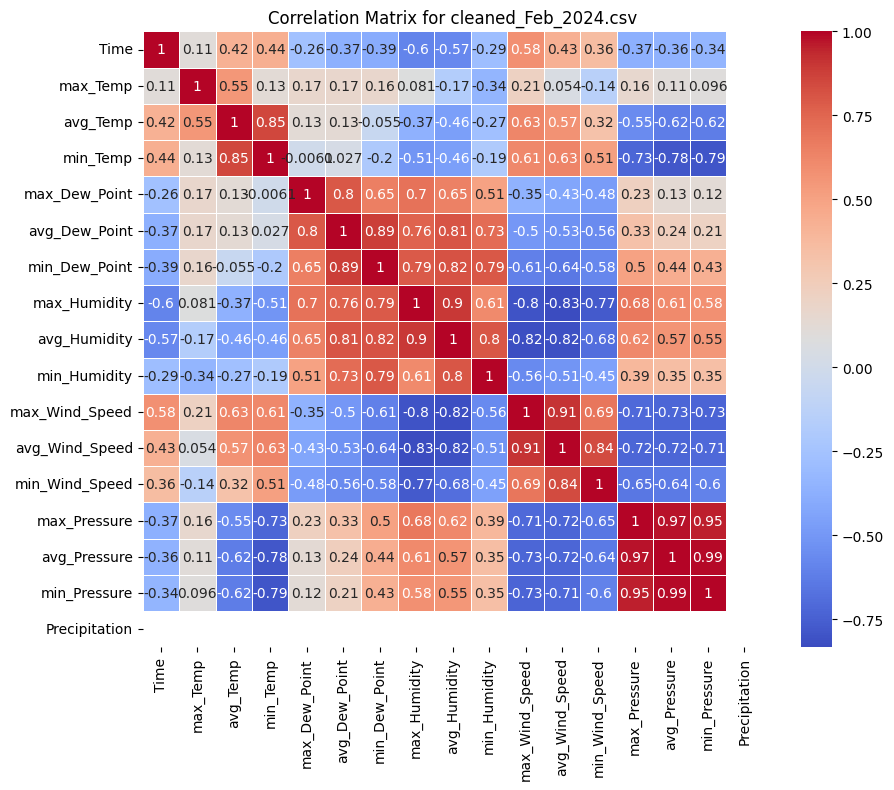

In [ ]:
calculate_correlation('/content/drive/MyDrive/Ai Projects/Wind Energy/Output/cleaned_Feb_2024.csv', 'avg_Wind_Speed')

Processing file: Jan_2024.csv


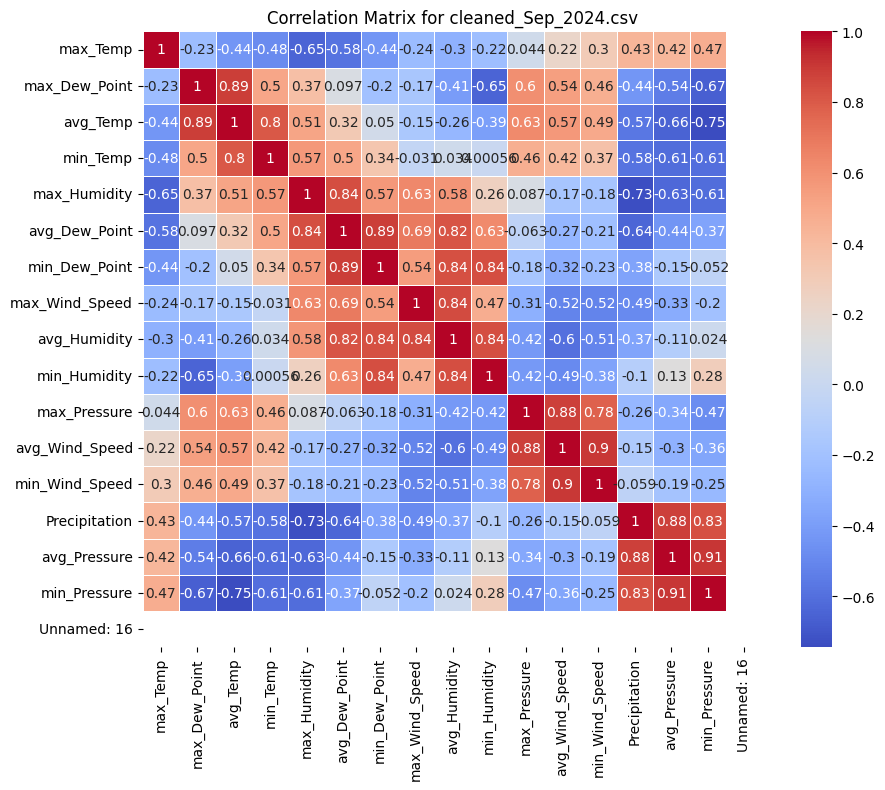

Skipped file: Jan_2024.csv 


--------------------------------------------------

Processing file: Feb_2024.csv


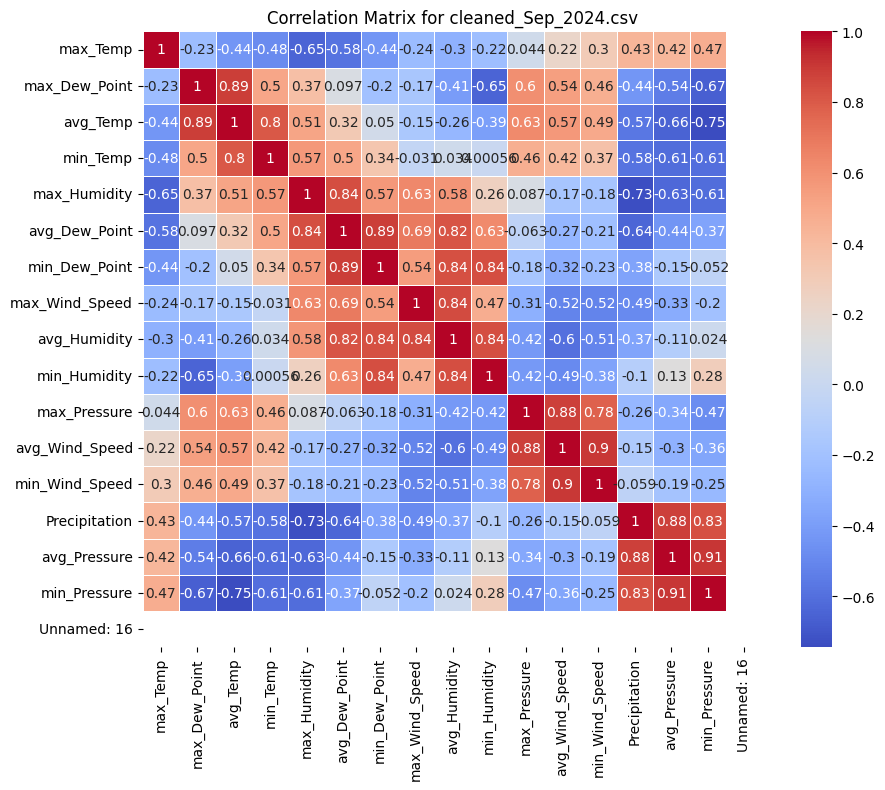

Skipped file: Feb_2024.csv 


--------------------------------------------------

Processing file: Mar_2024.csv


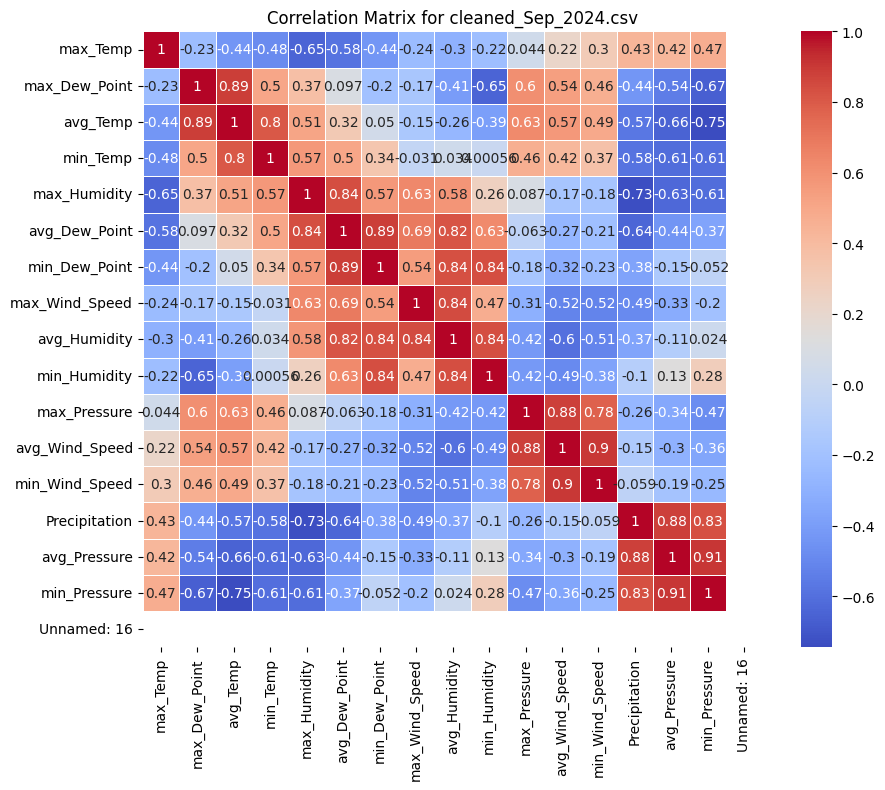

Skipped file: Mar_2024.csv 


--------------------------------------------------

Processing file: Apr_2024.csv


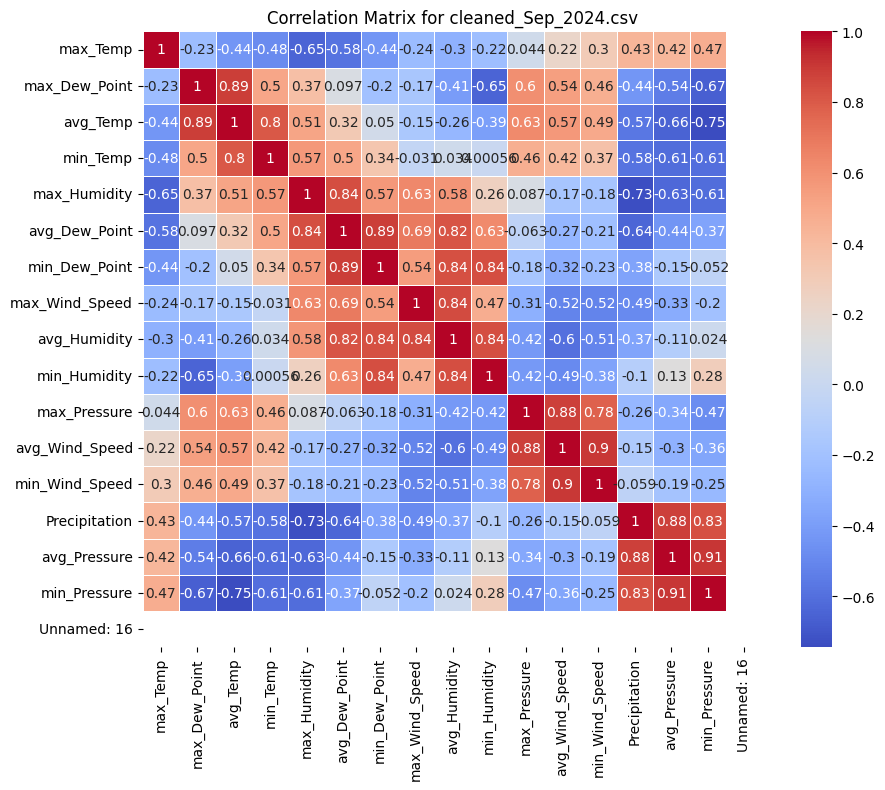

Skipped file: Apr_2024.csv 


--------------------------------------------------

Processing file: May_2024.csv


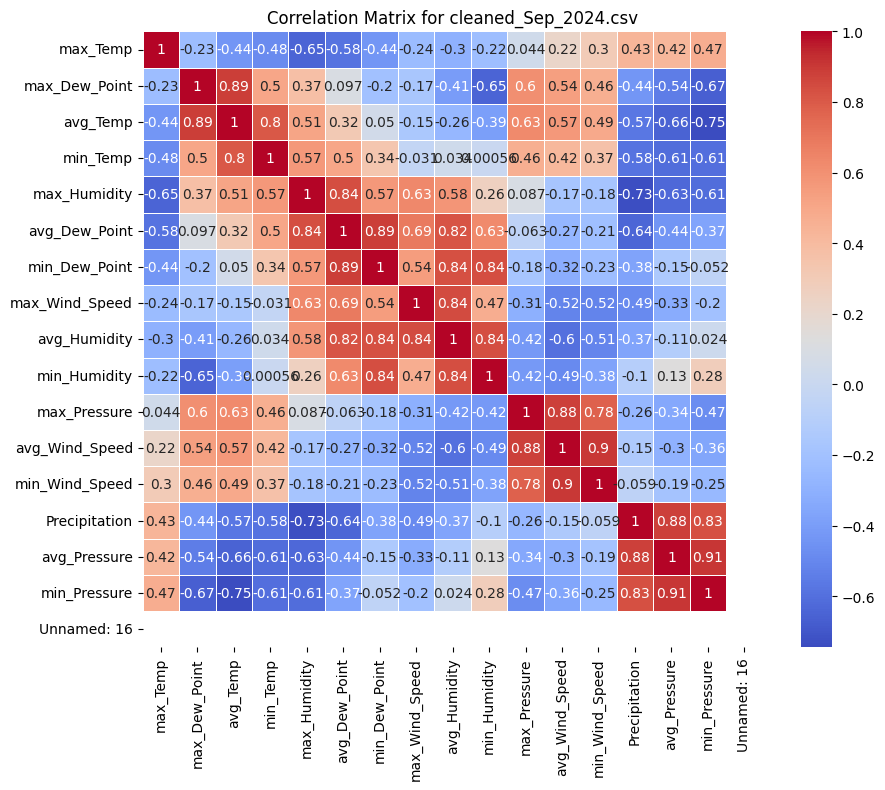

Skipped file: May_2024.csv 


--------------------------------------------------

Processing file: Jun_2024.csv


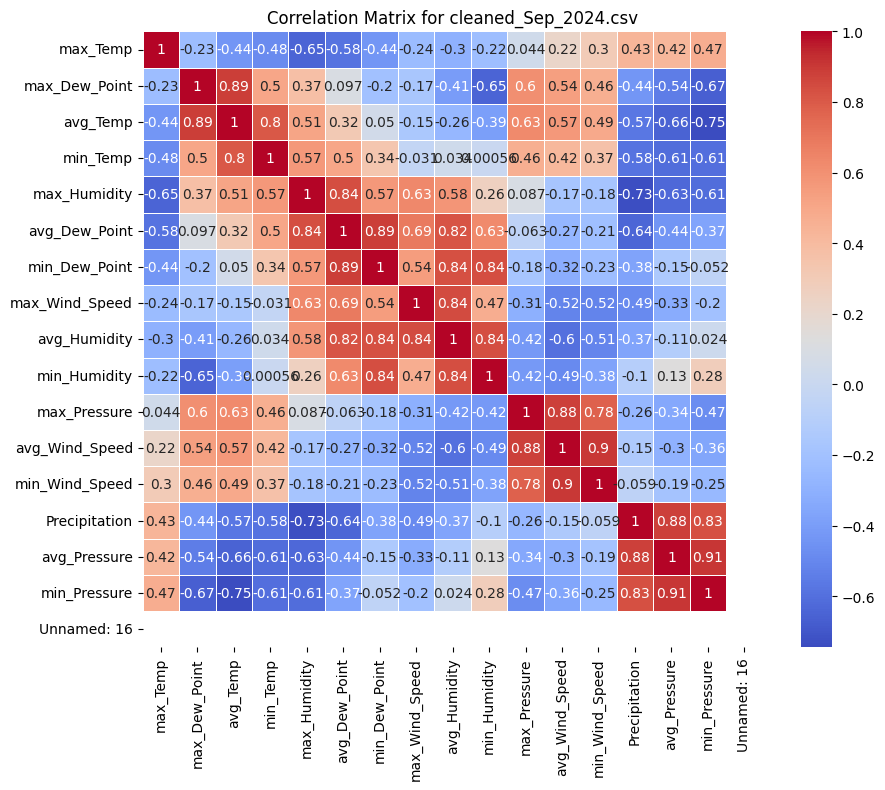

Skipped file: Jun_2024.csv 


--------------------------------------------------

Processing file: Jul_2024.csv


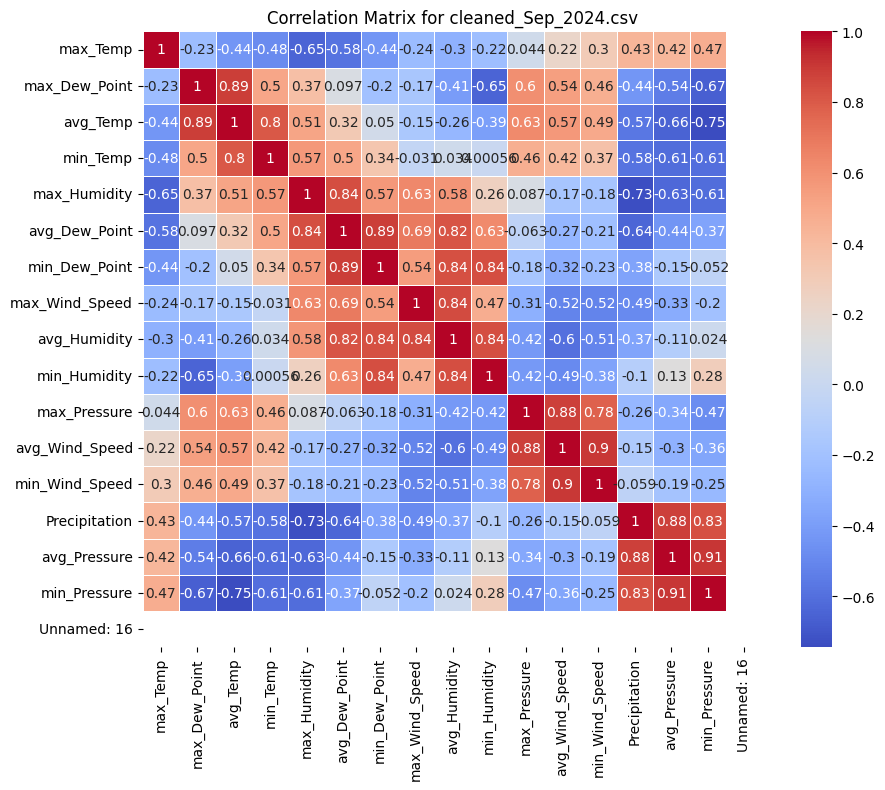

Skipped file: Jul_2024.csv 


--------------------------------------------------

Processing file: Aug_2024.csv


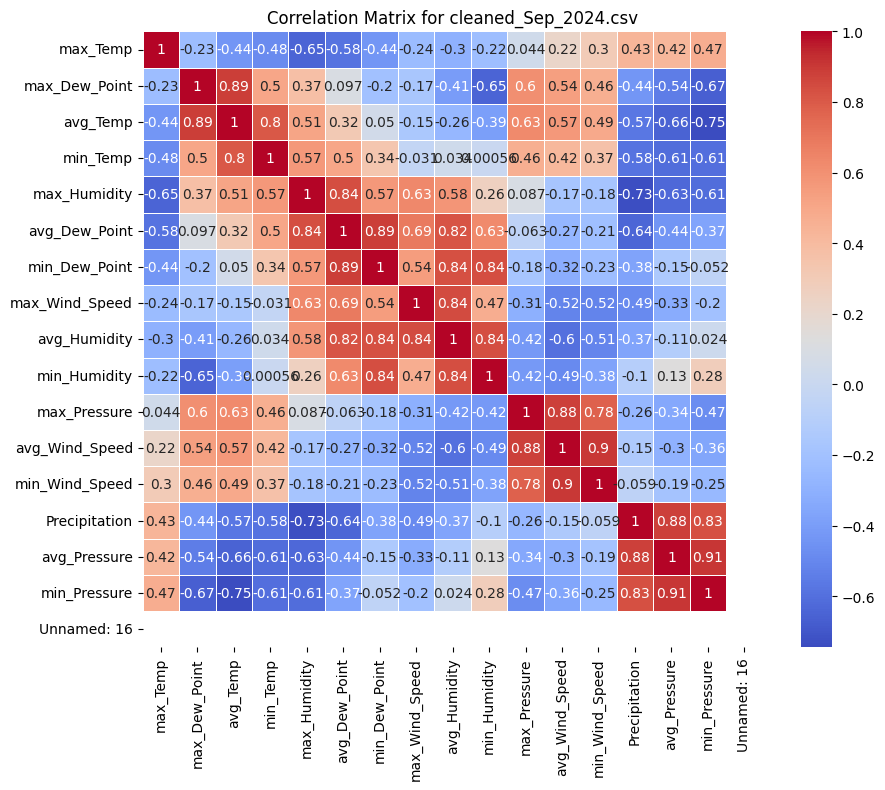

Skipped file: Aug_2024.csv 


--------------------------------------------------

Processing file: Sep_2024.csv


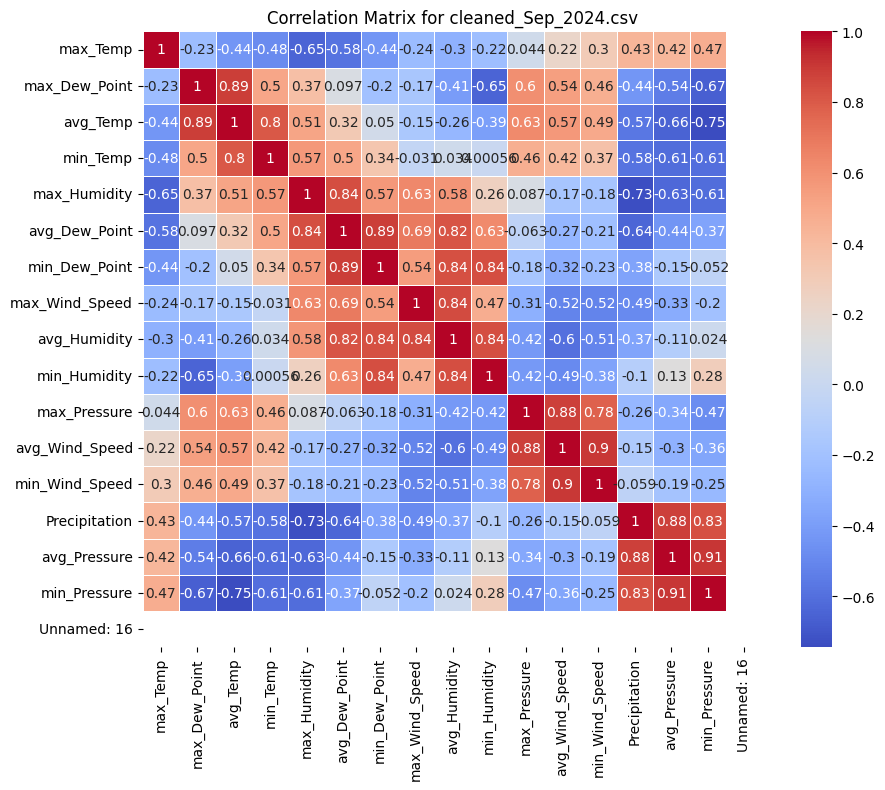

Skipped file: Sep_2024.csv 


--------------------------------------------------

All files processed!


In [ ]:
# Iterate through each CSV file in the folder
for filename in os.listdir(folder_path):
  if filename.endswith('.csv'):
    file_path = os.path.join(folder_path, filename)
    print(f"Processing file: {filename}")

    # Calculate correlation with wind speed column
    correlation = calculate_correlation(output_file_path, 'avg_Wind_Speed')
    if correlation is not None:
      print("Correlation with wind speed column:")
      print(correlation)
      print("\n")
    else:
      print(f"Skipped file: {filename} \n")

    print("\n" + "-"*50 + "\n")

print("All files processed!")

### **STEP 2: TRAINING THE REGRESSION MODEL**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
# Load and preprocess the data
def load_and_preprocess_data(output_file_path,wind_speed_column='avg_Wind_Speed'):
  # Load the dataset
  data = pd.read_csv(output_file_path)

  # Handle mising values (drop rows with NaN values)
  data = data.dropna()

  # Feature selection
  # Separate features (X) and target (y)
  if wind_speed_column in data.columns:
    X = data.drop(columns=[wind_speed_column]) # Features (all columns excluding the avg_wind_speed)
    y = data[wind_speed_column] # Target (wind speed)
    return X,y
  else:
    print(f"Warning: '{wind_speed_column}' column not found in {output_file_path}")
    return None, None

In [74]:
# Train the Regression model
def train_and_evaluate_regression_model(X,y, test_size=0.2):
  # Split the data into training (80%) and testing (20%) sets.
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

  # Create and train the linear regression model
  model = LinearRegression()
  model.fit(X_train, y_train)

  # Evaluate the model
  # Predict on test set
  y_pred = model.predict(X_test)

  # Calculate the performance metrics
  mae = mean_absolute_error(y_test, y_pred)
  mse = mean_squared_error(y_test, y_pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(y_test, y_pred)

  # Print evaluation metrics
  print("Model Performace:")
  print(f"Mean Absolute Error (MAE): {mae}")
  print(f"Mean Squared Error (MSE): {mse}")
  print(f"Root Mean Squared Error (RMSE): {rmse}")
  print(f"R-squared (R2) Score: {r2}")

  return model

##### **How to Interpret the Results:**
**Model Accuracy:**
1.   Low MAE, RMSE, MSE: If these values are low, it means your model is making small errors and predicting wind speed well.
2.   High MAE, RMSE, MSE: If these values are high, your model’s predictions are far from the actual values, indicating poor performance.


**Model Fit (R²):**
1. R² close to 1: A value close to 1 indicates that the model explains most of the variance in wind speed. This suggests the model is effective at predicting wind speed from the other features.

2. R² close to 0: If R² is near 0, the model is not capturing the relationship between wind speed and the features, meaning it’s no better than a baseline guess.

3. Negative R²: This indicates that the model is performing worse than a simple average prediction of wind speed.


In [ ]:
# Iterate through each CSV file and train/evaluate the model
folder_path = '/content/drive/MyDrive/Ai Projects/Wind Energy/Output'

for filename in os.listdir(folder_path):
  if filename.endswith('.csv'):
    file_path = os.path.join(folder_path, filename)
    print(f"\nProcessing file: {filename}")

    # Load and preprocess data
    X, y = load_and_preprocess_data(file_path, wind_speed_column='avg_Wind_Speed')

    if X is not None and y is not None:
      # Train and evaluate the regression model
      model = train_and_evaluate_regression_model(X, y)
    else:
      print(f"Skipped file: {filename} \n")

print("\nAll files processed!")



Processing file: cleaned_Jan_2024.csv
Model Performace:
Mean Absolute Error (MAE): 0.857107818346409
Mean Squared Error (MSE): 0.8715680089693405
Root Mean Squared Error (RMSE): 0.9335780679564728
R-squared (R2) Score: 0.9685043567365573

Processing file: cleaned_Feb_2024.csv
Model Performace:
Mean Absolute Error (MAE): 3.001362497293343
Mean Squared Error (MSE): 12.36112551601211
Root Mean Squared Error (RMSE): 3.515839233527624
R-squared (R2) Score: 0.5826489860947845

Processing file: cleaned_Mar_2024.csv
Model Performace:
Mean Absolute Error (MAE): 1.8482740282533634
Mean Squared Error (MSE): 4.277836625918708
Root Mean Squared Error (RMSE): 2.068293167304555
R-squared (R2) Score: 0.7436541584077087

Processing file: cleaned_Apr_2024.csv
Model Performace:
Mean Absolute Error (MAE): 0.8638407268620621
Mean Squared Error (MSE): 0.9973082960295239
Root Mean Squared Error (RMSE): 0.9986532411350417
R-squared (R2) Score: 0.7144428644153118

Processing file: cleaned_May_2024.csv
Model P